# Location Set Covering Problem (LSCP)
The location set coverage problem is a problem proposed by Toregas et al. (1971) <sup>[1]</sup>. He pointed out that emergency services must be arranged based on response time, as there is a maximum allowable service time when discussing how to handle emergency activities. Therefore, he proposed a model called LSCP.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#LSCP" data-toc-modified-id="LSCP-1.1">LSCP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-environment-by-importing-libraries" data-toc-modified-id="Set-up-the-environment-by-importing-libraries-2.1">Set up the environment by importing libraries</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Case1.-Solving-LSCP-(Location-Set-Covering-Problems)-with-synthetic-data" data-toc-modified-id="Case1.-Solving-LSCP-(Location-Set-Covering-Problems)-with-synthetic-data-3.1">Case1. Solving LSCP (Location Set Covering Problems) with synthetic data</a></span></li><li><span><a href="#Case2.-Solving-LSCP-(Location-Set-Covering-Problems)-with-real-world-data" data-toc-modified-id="Case2.-Solving-LSCP-(Location-Set-Covering-Problems)-with-real-world-data-3.2">Case2. Solving LSCP (Location Set Covering Problems) with real-world data</a></span></li></ul></li></ul></div>

## Problem Description

### LSCP
The location set covering problem is to find the locations of the minimum number of facilities, located on the nodes, which cover all the demands.

**Minimize the number of facilities required and determine their location so that each demand area is covered within a predefined maximum service distance or time.**

*Parameters*:
* $I=\{1,2,...,n\}$ : the set of customers (or demand points);  
* $J=\{1,2,...,m\}$ : the set of facilities;  
* $S$ : the maximal cover radius
* ${d_{ij}}$ : the shortest distance from node $i$ to the facilities $j$;  
* $N_i = \{j|d_{ij}<S\}$

###  Integer programming model:
$$
\begin{array}{lll}
\text{Min} &\sum_{j=1}^{n}x_j & (1) \\
\text{s.t.}&\sum\limits_{j\in {N_i}}{{x_j}\ge 1}\quad \forall i\in I, & (2)\\
& x_j\in \{0,1\},\ j=1,...,n. & (3)\\
\end{array}
$$

* The objective (1) minimizes the number of facilities required.<br>
* Constraints (2) determine for each demand point, at least one facilities can provide services to it.
* Constraints (3) indicate integer requirements.

[1] Toregas C, Swain R, ReVelle C, et al. The location of emergency service facilities[J]. Operations research, 1971, 19(6): 1363-1373.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib, and Hispot libraries to set up an environment

In [1]:
import random
import numpy as np
from pulp import *
import matplotlib.pyplot as plt
from hispot.coverage import LSCP

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open source linear programming solvers, such as `CBC` and `GLPK`; in addition, it also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`.
The default is CBC, and PuLP will be installed by default. For most problems, the CBC open source solver from COIN-OR will suffice.
You can use `listSolvers(onlyAvailable=True)` to check the available solvers.

In [2]:
np.random.seed(0) # random seed
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

['CPLEX_CMD', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Example

In this part, we will input synthetic data and real-world data and display them as two examples to represent random cases and real-world scenarios, respectively.

### Case1. Solving LSCP (Location Set Covering Problems) with synthetic data

Generate problem with synthetic data

In [3]:
n_points = 20
radius = 0.2
points = [(random.random(), random.random()) for i in range(n_points)]
points_np = np.array(points)

Output optimal solution

In [4]:
centers, obj = LSCP(num_points=n_points,
                    points=points_np,
                    solver=PULP_CBC_CMD(),
                    radius=radius).prob_solve()

Status: Optimal
Selected points = [1, 2, 4, 5, 8, 12, 17, 19]
The coverage radius = 0.2
Minimum cost = 8.0


In [5]:
from matplotlib.patches import Circle
def display_points_with_lscp(data, centers, radius):
    ax = plt.gca()
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.scatter(points_np[:, 0], points_np[:, 1], c='black', s=100, label="Demand Points")
    for i in centers:
        plt.scatter(points_np[i][0], points_np[i][1], c='red', marker='*', s=200)
        circle = Circle(xy=(points_np[i][0], points_np[i][1]), radius=radius, color='#1E90FF', fill=False, lw=2)
        ax.add_artist(circle)
    plt.scatter(points_np[i][0], points_np[i][1], c='red', marker='*', s=200, label="Centers")

Visualize optimal solution

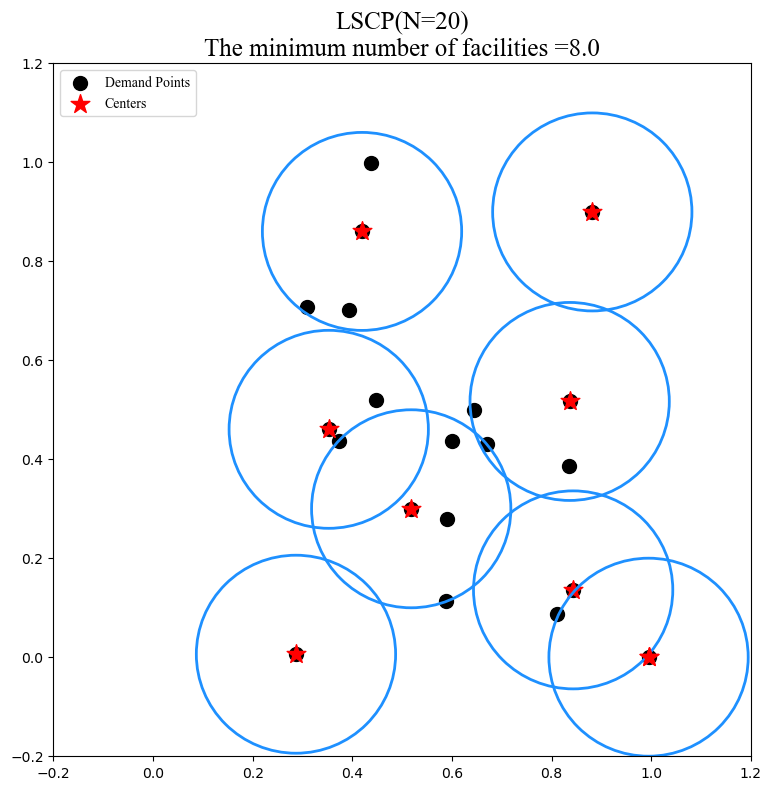

In [6]:
fig = plt.figure(figsize=(9, 9))
name = 'LSCP(N=' + str(n_points) + ')\nThe minimum number of facilities =' + str(obj)
plt.title(name, font='Times New Roman', fontsize = 18)
display_points_with_lscp(points_np, centers, radius)
plt.legend(loc='best', prop='Times New Roman', fontsize = 18) 
plt.show()

### Case2. Solving LSCP (Location Set Covering Problems) with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [7]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

We select Haidian District of Beijing the study area and read partial poi points in Haidian District.

In [8]:
%%time
region=gpd.read_file("../data/beijing/haidian/haidian.shp")
region.head(2)

CPU times: total: 15.6 ms
Wall time: 15.4 ms


,ID,geometry
0,1,"MULTIPOLYGON (((116.32906 39.99585, 116.32905 ..."
1,2,"POLYGON ((116.31515 40.02913, 116.31517 40.029..."


Partial POI data in Haidian district

In [9]:
%%time
poi = gpd.read_file("../data/beijing/haidian/haidian-poi.shp")
poi.shape[0]

CPU times: total: 0 ns
Wall time: 7 ms


47

In [10]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

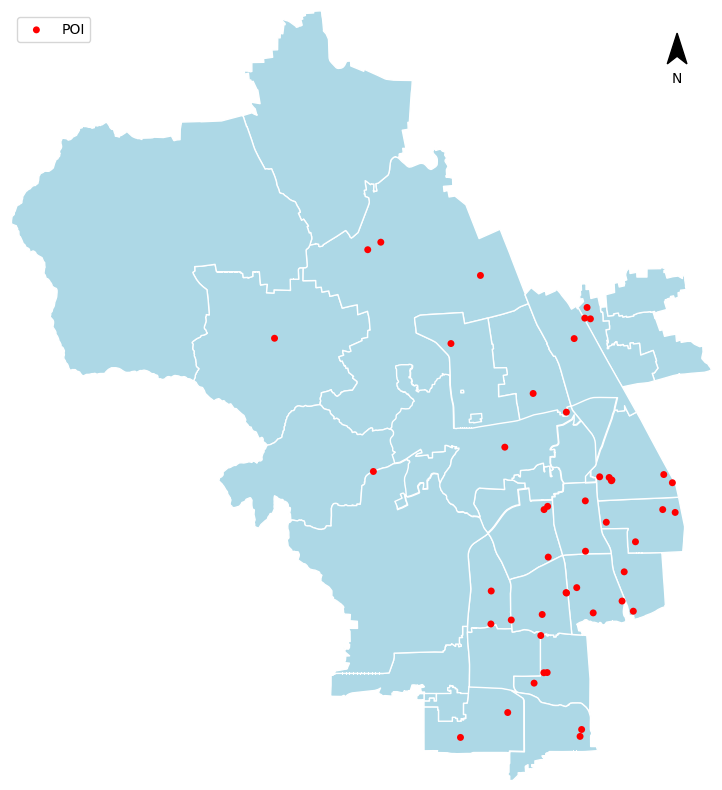

In [11]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="lightblue",
                   figsize=(12, 10))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='red',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)

Generate problem with real-world data

In [12]:
data = poi[['lon', 'lat']]
num_points = poi.shape[0]
radius=0.02
points = [(data['lon'][i], data['lat'][i]) for i in range(num_points)]
points_np = np.array(points)

Output optimal solution

In [13]:
centers, obj = LSCP(num_points=num_points,
                    points=points_np,
                    solver=PULP_CBC_CMD(),
                    radius=radius).prob_solve()

Status: Optimal
Selected points = [0, 2, 5, 10, 13, 14, 24, 27, 28, 30, 34, 36, 38, 42, 44, 45]
The coverage radius = 0.02
Minimum cost = 16.0


In [14]:
center_points = poi.iloc[centers]

In [15]:
from shapely.geometry.polygon import Polygon
def gen_circile_gdf(centers, radius, num_segments = 100):
    crs = 'EPSG:2381'
    Circles = gpd.GeoDataFrame(columns=['id', 'geometry'], crs=crs)
    k=0
    for center in centers:
        angles = [i * (360 / num_segments) for i in range(num_segments)]
        points = [(center[0] + radius * np.cos(np.radians(a)), center[1] + radius * np.sin(np.radians(a))) for a in angles]
        circle = Polygon(points)
        Circles.loc[k] = [k+1, circle]
        k = k+1
    return Circles
radius

0.02

In [16]:
coverage = gen_circile_gdf(points_np[centers], radius)

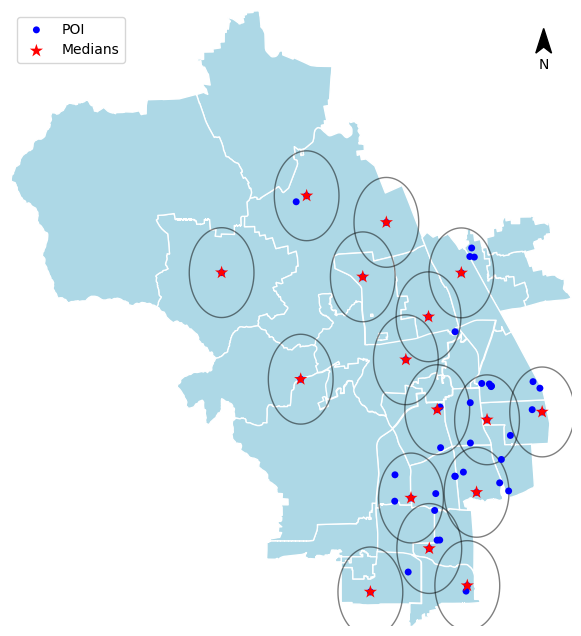

In [17]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="lightblue",
                   figsize=(10, 8))
gplt.polyplot(coverage,
              projection=gcrs.AlbersEqualArea(),
              edgecolor="black", 
              alpha=0.5,
              zorder=1,
              ax=ax)
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='blue',
               alpha=1,
               linewidth=0,
               label='POI',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points, 
               extent=region.total_bounds,
               s=10,
               color='red',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Medians',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='upper left')
